# Importing Libraries
   We will need to import some libraries. 
   **Numpy** is used for some math functions.
   **Matplotlib** is used for visualizing the data whenever we need to.
   **Keras** is used to create our neural network model.
   **Sklearn** and **seaborn** are used in order to create a confusion matrix at the end.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(1)

# Importing Dataset
We import the **mnist** dataset directly from keras datasets, as it is a commonly used dataset for starting with machine learning

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualizing the data
For starters we want to visualize the data so we will use **matplotlib** to plot an example of each of the 10 classes that we have (from 0 to 9) in our input data. Then we will visualize the labels and convert them to a more convenient format.

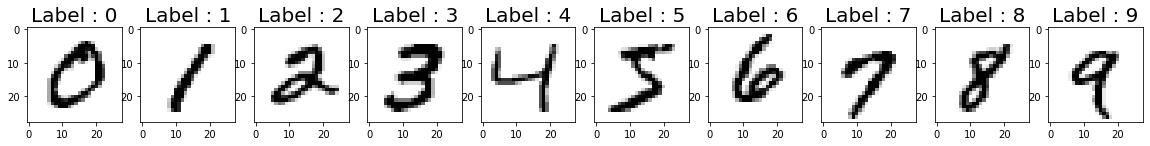

In [4]:
# Visualizing the data
num_classes= 10
f , ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range (0, num_classes):
    sample = x_train[ y_train == i][0]
    ax[i].imshow(sample, cmap = plt.cm.binary)
    ax[i].set_title("Label : {}".format(i), fontsize = 20)

In [5]:
# To visualize the labels i printed the first 10 of them
for i in range(10):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [6]:
# Converting the labels in a better format
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
# I am printing the labels again to see that they changed as intended
for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Data Preparation
In many machine learning projects, data preparation is one of the most important tasks in order to achieve optimal results.Fortunately, in this particular case, data preparation is quite a simple task. We will need to do two things. Firstly, we need to normalize our input data (instead of values between 0 and 255 we will normalize them between 0 and 1). Secondly, we will need to flatten our input data so instead of 2-dimensional shape of 28x28 we will have 1-dimentional shape of 784.

### Data Normalization

In [8]:
# We need to normalize the data so we take all the values from 0 to 255 and we
# normalize them between 0 and 1 dividing by 255. This will make help a lot 
# with our calculations later.

# x_train = tf.keras.utils.normalize(x_train, axis = 1)
# x_test = tf.keras.utils.normalize(x_test, axis = 1)
# or simply do :

x_train = x_train / 255.0
x_test = x_test / 255.0

### Data Reshaping

In [9]:
#lets see the input data shape as it is
x_train[0].shape

(28, 28)

In [10]:
# We will flatten the data from (28,28) matrices to (748,)

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


# Create the Model (Fully Connected NN)
 The model that will be used is **Sequential**, which basically means a fully connected neural network.
 We will also use some common activation functions like **'relu'** and **'softmax'**. Also the **'dropout'** is used
 to avoid overfitting. Finally we use some common functions to measure loss (**categorical crossentropy**) and to optimize (**adam**).

In [11]:

model = Sequential()

model.add(Dense(units=192, input_shape=(784,), activation='relu'))
model.add(Dense(units=192, activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 192)               150720    
_________________________________________________________________
dense_1 (Dense)              (None, 192)               37056     
_________________________________________________________________
dropout (Dropout)            (None, 192)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1930      
Total params: 189,706
Trainable params: 189,706
Non-trainable params: 0
_________________________________________________________________


# Training the Model
Now for the easy part, the training. We will use batches to make it easier. After the training we will evaluate our model using the test data we have.

In [12]:
batch_size = 512
epochs = 15
model.fit(x = x_train, y= y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/15
118/118 [==============================] - 1s 5ms/step - loss: 0.5342 - accuracy: 0.8438
Epoch 2/15
118/118 [==============================] - 1s 5ms/step - loss: 0.1942 - accuracy: 0.9435
Epoch 3/15
118/118 [==============================] - 1s 5ms/step - loss: 0.1401 - accuracy: 0.9587
Epoch 4/15
118/118 [==============================] - 1s 5ms/step - loss: 0.1078 - accuracy: 0.9677
Epoch 5/15
118/118 [==============================] - 1s 5ms/step - loss: 0.0867 - accuracy: 0.9745
Epoch 6/15
118/118 [==============================] - 1s 5ms/step - loss: 0.0733 - accuracy: 0.9779
Epoch 7/15
118/118 [==============================] - 1s 5ms/step - loss: 0.0627 - accuracy: 0.9811
Epoch 8/15
118/118 [==============================] - 1s 5ms/step - loss: 0.0517 - accuracy: 0.9844
Epoch 9/15
118/118 [==============================] - 1s 5ms/step - loss: 0.0447 - accuracy: 0.9866
Epoch 10/15
118/118 [==============================] - 1s 5ms/step - loss: 0.0397 - accuracy: 0.9874

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 0s 499us/step - loss: 0.0668 - accuracy: 0.9798
Test Loss: 0.06675480306148529, Test Accuracy: 0.9797999858856201


[[4.90856911e-09 1.77618162e-07 6.36191544e-07 ... 9.99934077e-01
  4.59392851e-07 1.70667249e-06]
 [1.20533574e-08 2.86104432e-06 9.99994636e-01 ... 3.68524683e-10
  1.13490275e-08 2.73934022e-12]
 [1.59636670e-06 9.99734819e-01 1.61284988e-05 ... 9.17656653e-05
  1.03165359e-04 4.05400044e-07]
 ...
 [2.73643053e-11 4.41028281e-09 2.43169269e-11 ... 3.63949567e-07
  9.39925027e-09 9.30787607e-08]
 [1.71416579e-11 1.56288073e-11 1.44849573e-13 ... 2.41155845e-11
  6.90083937e-07 2.02311380e-13]
 [9.26578902e-09 3.00659220e-11 6.97729201e-12 ... 2.77513405e-14
  5.25790392e-12 8.38427661e-11]]
[7 2 1 ... 4 5 6]


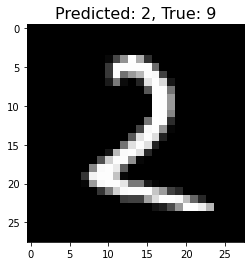

In [16]:
# We can now visualize a single predicted example
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

rand = np.random.choice(len(x_test))
x_sample = x_test[rand]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[rand]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

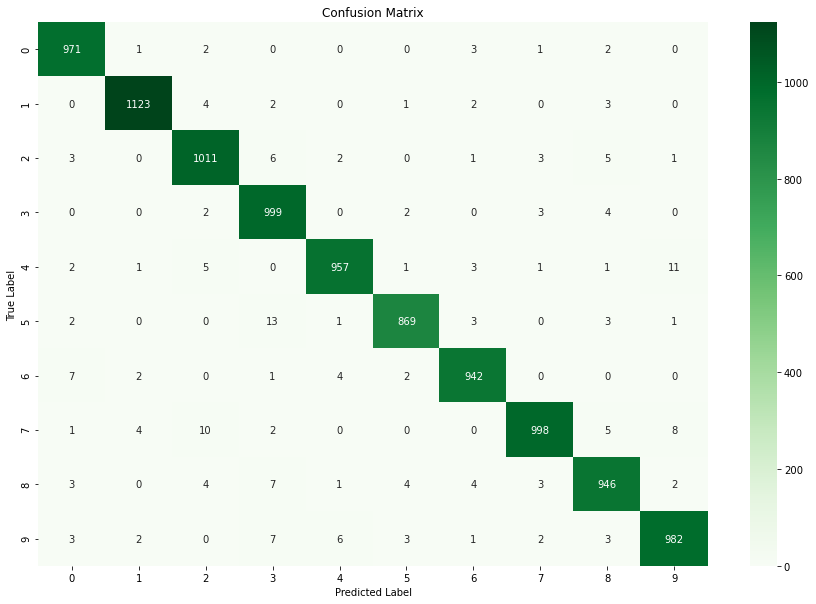

In [15]:
# Finally we can plot a confusion matrix to visualize how well our model can predict in the test data.
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Greens")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');
